In [2]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read the csv file
data = pd.read_csv("penguins.csv")
# Check for missing values
print(data.isnull().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64


In [4]:
#Shape of data before removing null values
data.shape

(344, 8)

In [5]:
#dropping missing values
data.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g','sex'], inplace=True)


In [6]:
#Shape of data after removing null values
data.shape

(333, 8)

In [7]:
#The null values are removed
print(data.isnull().sum())

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64


In [8]:
#description of data
data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [9]:
#first 5 elements of the data
data.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [10]:
#Number of duplicate rows
data.duplicated().sum()

0

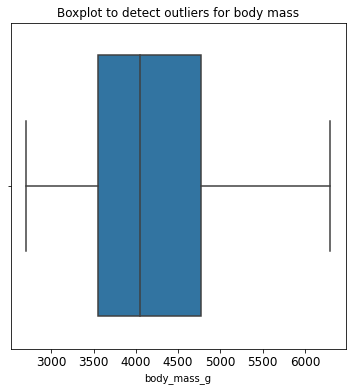

In [11]:
# Create a boxplot to visualize distribution of `body_mass_g` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for body mass', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data['body_mass_g'])
plt.show()

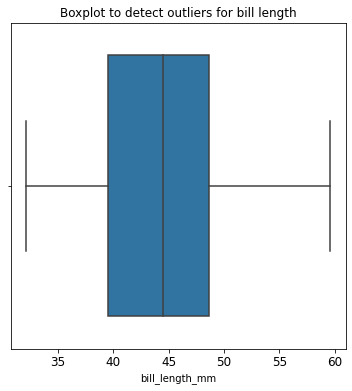

In [12]:
# Create a boxplot to visualize distribution of `bill_length_mm` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for bill length', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data['bill_length_mm'])
plt.show()

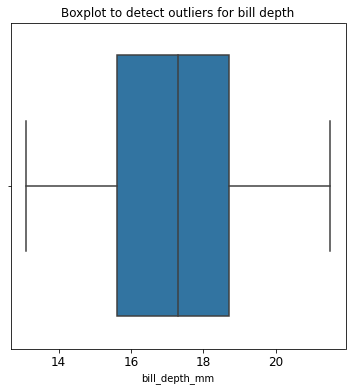

In [13]:
# Create a boxplot to visualize distribution of `bill_depth_mm` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for bill depth', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data['bill_depth_mm'])
plt.show()

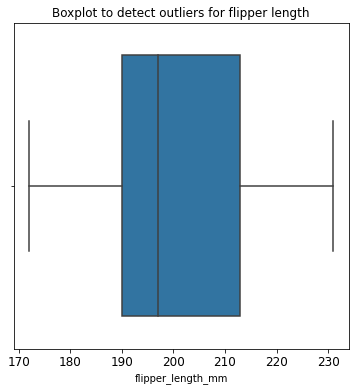

In [14]:
# Create a boxplot to visualize distribution of `flipper_length_mm` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for flipper length', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data['flipper_length_mm'])
plt.show()

No outliers in any of the above columns mentioned

In [15]:
# Get numbers of each sex
print(data['sex'].value_counts())
print()

# Get percentages of each sex
print(data['sex'].value_counts(normalize=True))

male      168
female    165
Name: sex, dtype: int64

male      0.504505
female    0.495495
Name: sex, dtype: float64


The sex column is almost balanced so no need to do the balancing of the data

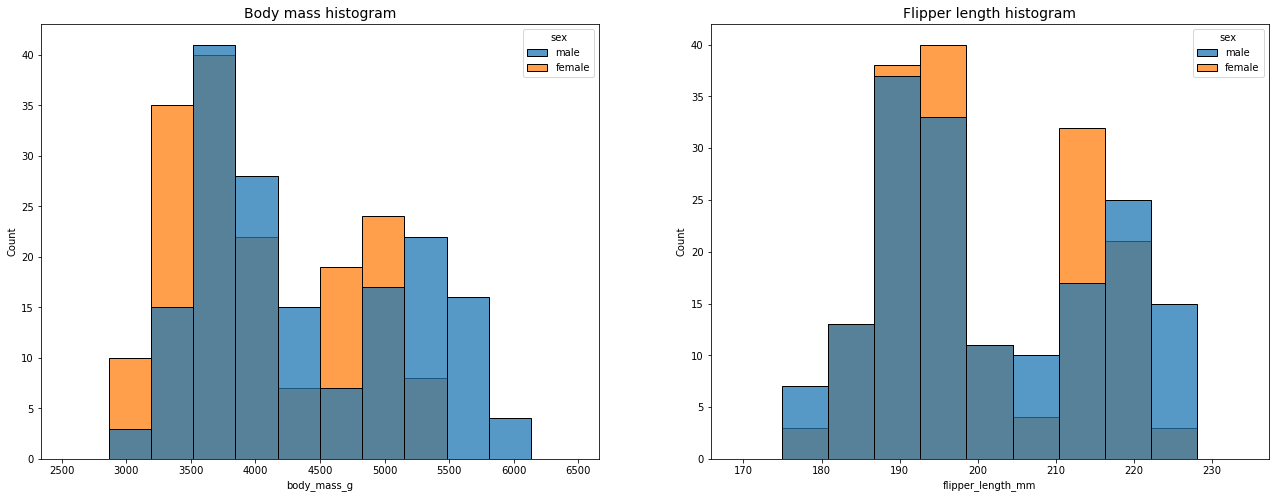

In [16]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

# Create histogram showing the distribution of 'body_mass_g' for each sex
female = data[data['sex'] == 'female']['body_mass_g']
male = data[data['sex'] == 'male']['body_mass_g']
sns.histplot(data=data, x='body_mass_g', hue='sex', multiple='dodge', shrink=2, ax=ax[0])
ax[0].set_title('Body mass histogram', fontsize='14')

# Create another histogram showing the distribution of 'flipper_length_mm' for each sex
female = data[data['sex'] == 'female']['flipper_length_mm']
male = data[data['sex'] == 'male']['flipper_length_mm']
sns.histplot(data=data, x='flipper_length_mm', hue='sex', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Flipper length histogram', fontsize='14')

# Display the plots
plt.show()


In [17]:
# Calculate mean and median body mass of each sex
data.groupby(['sex'])['body_mass_g'].agg([np.mean,np.median])

,mean,median
sex,,
female,3862.272727,3650.0
male,4545.684524,4300.0


In [18]:
# Calculate mean and median flipper length of each sex
data.groupby(['sex'])['flipper_length_mm'].agg([np.mean,np.median])

,mean,median
sex,,
female,197.363636,193.0
male,204.505952,200.5


In [19]:
# Use get_dummies to make three separate columns
df_heatmap = pd.get_dummies(data, columns=['sex'], dtype=int)

df_heatmap.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,sex_female,sex_male
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2007,0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,2007,1,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,2007,1,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,2007,1,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,2007,0,1


Text(0.5, 1.0, 'Correlation Heatmap')

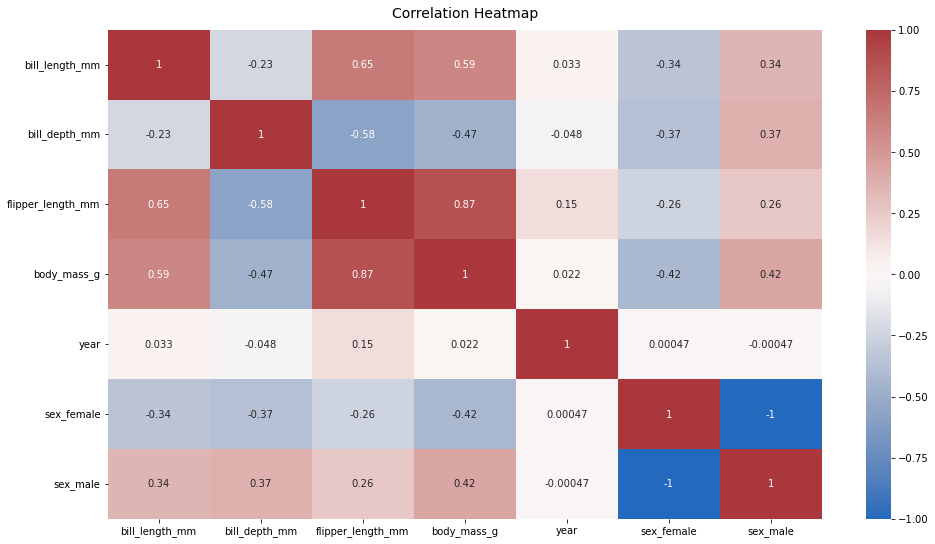

In [20]:
#plotting the heatmap to see the correlation
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df_heatmap.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)

In [21]:
#Convert features with string datatype to categorical
data['species'] = data['species'].astype('category')
data['island'] = data['island'].astype('category')
data['sex'] = data['sex'].astype('category')

In [22]:
#Normalize non-categorical features
def normalize_column(column):
    min_val = column.min()
    max_val = column.max()
    return (column - min_val) / (max_val - min_val)

data['bill_length_mm'] = normalize_column(data['bill_length_mm'])
data['bill_depth_mm'] = normalize_column(data['bill_depth_mm'])
data['flipper_length_mm'] = normalize_column(data['flipper_length_mm'])
data['body_mass_g'] = normalize_column(data['body_mass_g'])

0.8805970149253731


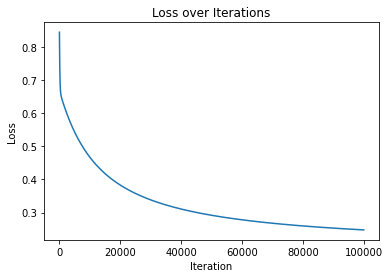

In [24]:
import pickle
import numpy as np

# Use 'sex' as the target variable (binary classifier).
X = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = data['sex']

# Encode the 'sex' column
def label_encode(y):
    unique_labels = list(set(y))  # Get the unique labels in the target variable
    label_map = {label: index for index, label in enumerate(unique_labels)}
    encoded_y = [label_map[label] for label in y]
    return encoded_y

# Apply custom label encoding to your target variable
y_encoded = label_encode(y)


# Divide the dataset into training and test sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y_encoded[:train_size], y_encoded[train_size:]

#MinMax Scaling the data
def min_max_scaling(data, feature_range=(0, 1)):
    min_val = feature_range[0]
    max_val = feature_range[1]
    
    min_data = data.min(axis=0)
    max_data = data.max(axis=0)
    
    scaled_data = (data - min_data) / (max_data - min_data) * (max_val - min_val) + min_val
    
    return scaled_data

# Apply custom Min-Max scaling to your training and test data
X_train_scaled = min_max_scaling(X_train)
X_test_scaled = min_max_scaling(X_test)

class LogitRegression:
    def __init__(self, learning_rate=0.01, iterations=10000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost(self, y, h):
        m = len(y)
        cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        return cost

    def gradient_descent(self, X, y, h):
        m = len(y)
        error = h - y
        gradient = (1 / m) * np.dot(X.T, error)
        return gradient, np.sum(error) / m

    def fit(self, X, y):
        rows, features = X.shape
        self.weights = np.random.uniform(0, 1, features)
        self.bias = 0.5
        loss_history = []

        y_train = np.array(y)  # Convert y to a numpy array

        for _ in range(self.iterations):
            z = np.dot(X, self.weights) + self.bias
            h = self.sigmoid(z)

            gradient, bias_gradient = self.gradient_descent(X, y_train, h)

            self.weights -= self.learning_rate * gradient
            self.bias -= self.learning_rate * bias_gradient

            cost = self.cost(y_train, h)
            loss_history.append(cost)

        pickle.dump((self.weights, self.bias), open("Log_Reg_Model.pickle", "wb"))
        return loss_history


    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        probabilities = self.sigmoid(z)
        predictions = (probabilities >= 0.5).astype(int)
        return predictions
    
    def accuracy(self, X_test, y_test):
        y = self.predict(X_test)
        preds = np.sum(y == y_test)
        return preds / len(y_test)

# Train the model with scaled data and encoded target
learning_rate = 0.01  # Adjust learning rate
iterations = 100000  # Adjust the number of iterations
model = LogitRegression(learning_rate, iterations)
loss_history = model.fit(X_train_scaled, y_train)

# Make predictions on the test dataset with scaled data
predictions = model.predict(X_test_scaled)

print(model.accuracy(X_test_scaled,y_test))

# # Calculate and print accuracy
# accuracy = np.mean(predictions == y_test)
# print(f"Accuracy: {accuracy * 100:.2f}%")

# Print out the loss values over each iteration
import matplotlib.pyplot as plt
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()


0.5074626865671642


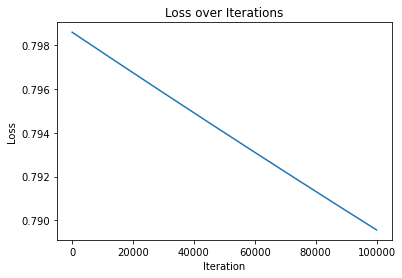

In [25]:
#predicting the values with learning_rate = 1e-6 and iterations = 100000
model1 = LogitRegression(1e-6,100000)
model1.fit(X_train_scaled, y_train)
print(model1.accuracy(X_test_scaled,y_test))
loss_history1 = model1.fit(X_train_scaled, y_train)

plt.plot(loss_history1)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()

0.8507462686567164


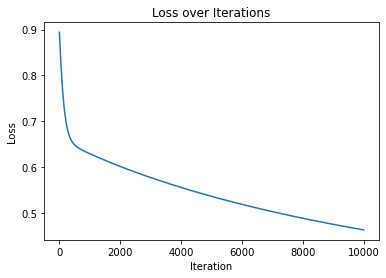

In [26]:
#predicting the values with learning_rate = 0.01 and iterations = 10000
model2 = LogitRegression(0.01,10000)
model2.fit(X_train_scaled, y_train)
print(model2.accuracy(X_test_scaled,y_test))
loss_history2 = model2.fit(X_train_scaled, y_train)

plt.plot(loss_history2)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()


0.8805970149253731


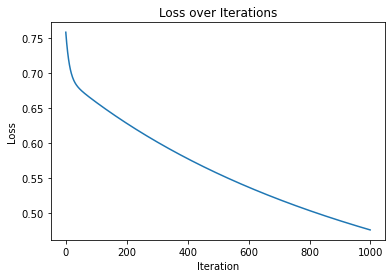

In [27]:
#predicting the values with learning_rate = 0.1 and iterations = 1000
model3 = LogitRegression(0.1,1000)
model3.fit(X_train_scaled, y_train)
print(model3.accuracy(X_test_scaled,y_test))

loss_history3 = model3.fit(X_train_scaled, y_train)

plt.plot(loss_history3)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()
